### Importing dataset

In [24]:
import pandas as pd
biodeg = pd.read_csv("biodeg.csv")

### dataset information

In [25]:
biodeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   1055 non-null   float64
 1   Column2   1055 non-null   float64
 2   Column3   1055 non-null   int64  
 3   Column4   1055 non-null   int64  
 4   Column5   1055 non-null   int64  
 5   Column6   1055 non-null   int64  
 6   Column7   1055 non-null   int64  
 7   Column8   1055 non-null   float64
 8   Column9   1055 non-null   int64  
 9   Column10  1055 non-null   int64  
 10  Column11  1055 non-null   int64  
 11  Column12  1055 non-null   float64
 12  Column13  1055 non-null   float64
 13  Column14  1055 non-null   float64
 14  Column15  1055 non-null   float64
 15  Column16  1055 non-null   int64  
 16  Column17  1055 non-null   float64
 17  Column18  1055 non-null   float64
 18  Column19  1055 non-null   int64  
 19  Column20  1055 non-null   int64  
 20  Column21  1055 non-null   int6

### Renaming column headers

In [26]:
colnames = [["SpMax","JDze", "nHM", "F01[N-N]", "F04[C-N]", "NssssC", "nCb",
            "C%", "nCp", "nO", "F03[C-N]", "SdssC", "HyWiB(m)", "LOC", "SM6_L",
            "F03[C-O]", "Me", "Mi", "nN-N", "nArNO2", "nCRX3", "SpPosA_B(p)",
            "nCIR", "B01[C-Br]", "B03[C-Cl]", "N-073", "SpMax_A", "Psi_i_1d",
            "B04[C-Br]", "SdO", "TI2_L", "nCrt", "C-026", "F02[C-N]", "nHDon",
            "SpMax_B(m)", "Psi_i_A", "nN", "SM6_B(m)", "nArCOOR", "nX", 
            "target"]]

collist = biodeg.columns.tolist()

In [27]:
for newcols in colnames:
    col_mapping = dict(zip(collist, newcols))
biodeg.rename(columns=col_mapping, inplace=True)
biodeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SpMax        1055 non-null   float64
 1   JDze         1055 non-null   float64
 2   nHM          1055 non-null   int64  
 3   F01[N-N]     1055 non-null   int64  
 4   F04[C-N]     1055 non-null   int64  
 5   NssssC       1055 non-null   int64  
 6   nCb          1055 non-null   int64  
 7   C%           1055 non-null   float64
 8   nCp          1055 non-null   int64  
 9   nO           1055 non-null   int64  
 10  F03[C-N]     1055 non-null   int64  
 11  SdssC        1055 non-null   float64
 12  HyWiB(m)     1055 non-null   float64
 13  LOC          1055 non-null   float64
 14  SM6_L        1055 non-null   float64
 15  F03[C-O]     1055 non-null   int64  
 16  Me           1055 non-null   float64
 17  Mi           1055 non-null   float64
 18  nN-N         1055 non-null   int64  
 19  nArNO2

### Visualize the data

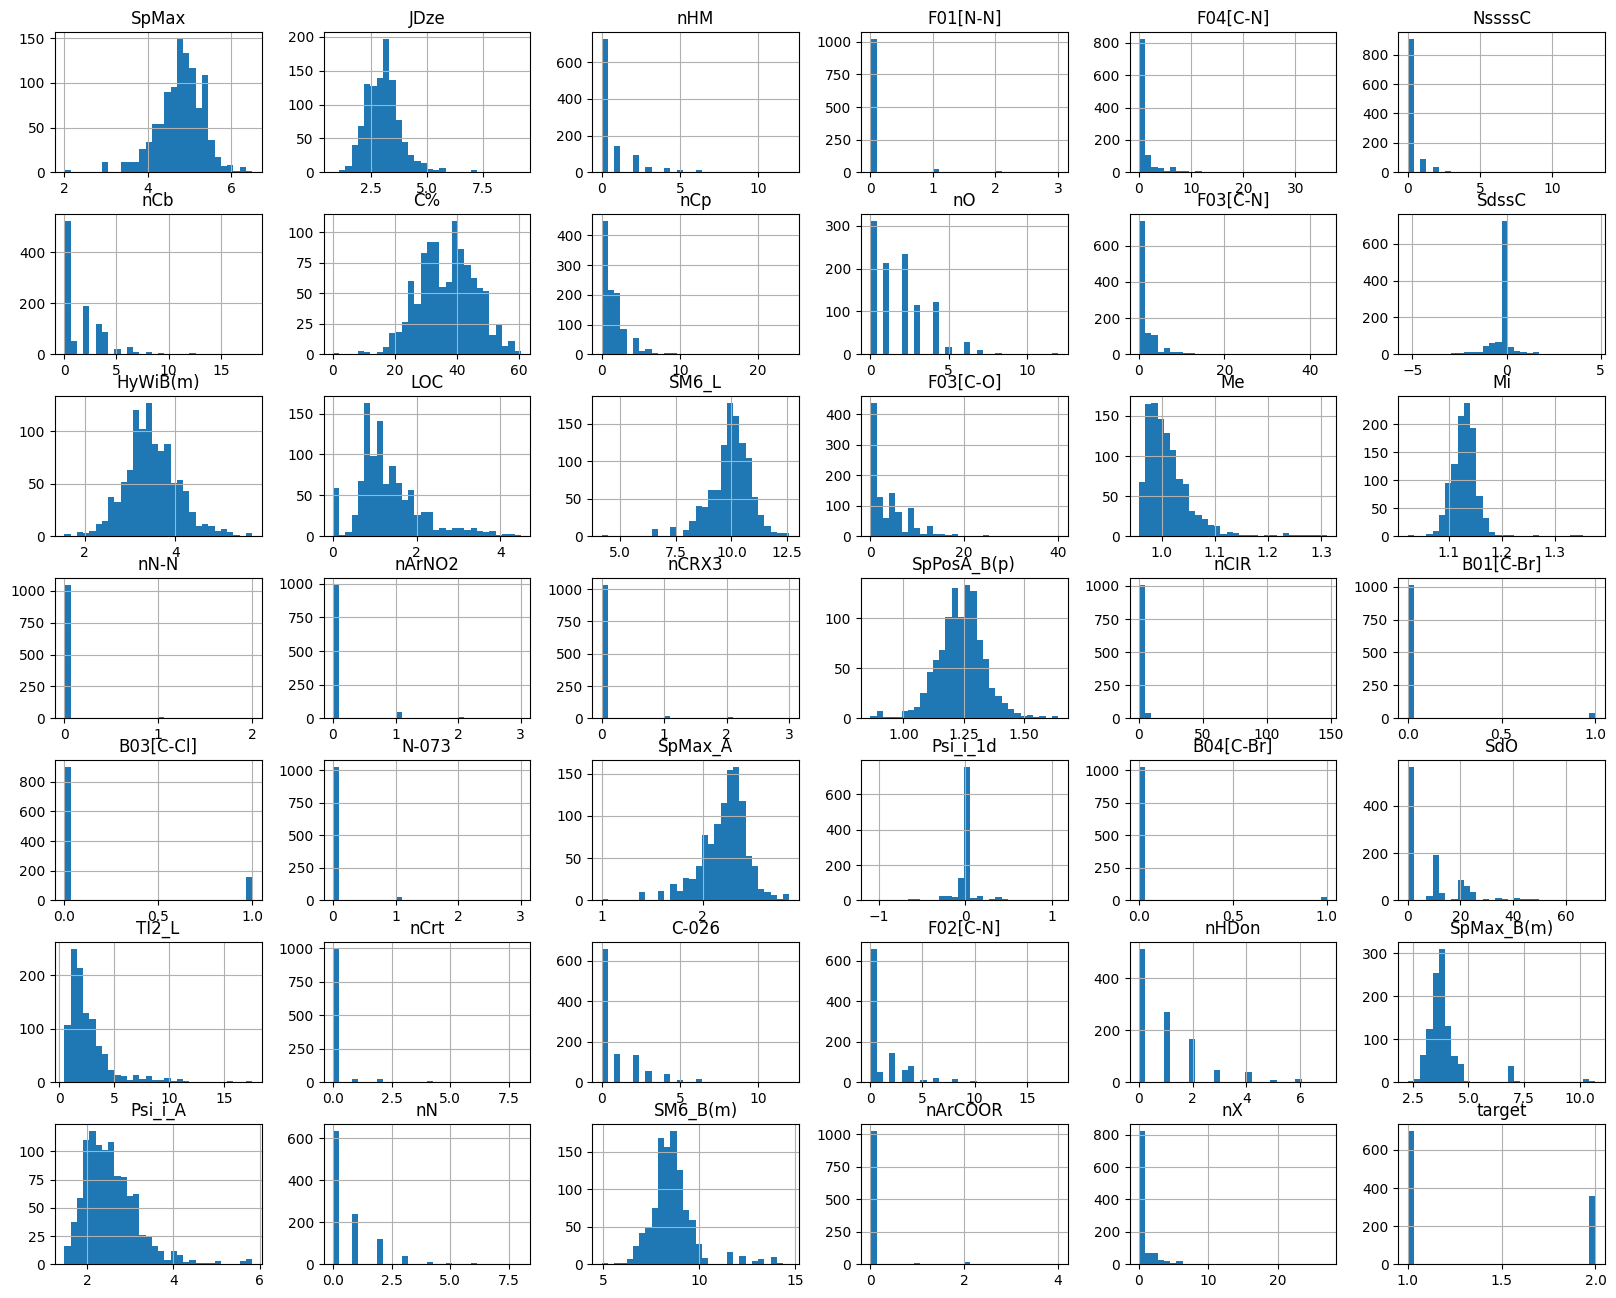

In [28]:
import matplotlib.pyplot as plt
biodeg.hist(bins=30, figsize=(20,16))
plt.show()

### selecting target and features

In [29]:
x = biodeg.drop("target", axis=1)
y = biodeg["target"]

print(x.shape)
print(y.shape)

(1055, 41)
(1055,)


# Question 1

### Transforming data and creating training and testing set

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                        test_size=0.3, random_state=47)

print(x_train.shape)
print(y_train.shape)

(738, 41)
(738,)


### Model performance function

In [31]:
# model performance function
import numpy as np  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from imblearn.metrics import geometric_mean_score

cv = KFold(n_splits=10, shuffle=True, random_state=47)

def model_performance_fn(ytest, pred, model):
    AUC = roc_auc_score(ytest, pred)
    f1score = f1_score(y_true=ytest, y_pred=pred)
    gmean = geometric_mean_score(ytest, pred)
    precision = precision_score(y_true=ytest, y_pred=pred)
    recall = recall_score(y_true=ytest, y_pred=pred)
    print("AUC: %.3f " % AUC, "G-mean: %.3f" % gmean, 
        "Precision: %.3f " % precision, 
        "f1_score: %.3f " % f1score, "Recall: %.3f " % recall)

## Developing decision tree model and metrics

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
parameters = {
    'max_depth':[2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split':[2, 5, 10, 25, 50, 100],
    'min_samples_leaf':[2, 5, 10, 25, 50, 100]
}

clftree = GridSearchCV(tree, parameters, cv=cv)
clftree.fit(x_train, y_train)
besttree = clftree.best_estimator_

# Perform 10-fold cross-validation
scorestree = cross_val_score(besttree, x, y)
print("Cross-validation scores Tree: ", np.round(np.mean(scorestree),3))

# model performance
predstree = besttree.predict(x_test)
#model_performance_fn(y_test, predstree, besttree)

Cross-validation scores Tree:  0.81


### SVC Model and metrics

In [33]:
from sklearn.svm import SVC

svc = SVC()
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
                    'C':[0.001, 0.001, 0.1, 1, 2, 5, 10]}

clf = GridSearchCV(svc, parameters, cv=cv)
clf.fit(x_train, y_train)
bestsvc = clf.best_estimator_

scores = cross_val_score(bestsvc, x, y)
print("Cross-validation scores SVC: ", np.round(np.mean(scores),3))

preds = bestsvc.predict(x_test)
#model_performance_fn(y_test, preds, bestsvc)

Cross-validation scores SVC:  0.862


### Metrics for Do NOTHING data

In [34]:
modeloutDN = pd.DataFrame({
    'AUC':[0.807, 0.855],
    'F1-Measure':[0.866, 0.93],
    'G-Mean':[0.804, 0.853],
    'Precision':[0.856, 0.886],
    'Recall':[0.877, 0.921],
    },index = ['Decision Tree', 'SVC'])

print(modeloutDN)

                 AUC  F1-Measure  G-Mean  Precision  Recall
Decision Tree  0.807       0.866   0.804      0.856   0.877
SVC            0.855       0.930   0.853      0.886   0.921


### Which model performs better
The Support Vector Machine classifier with corss validation score of 0.864(86%) performs better than the Decision tree classifier model which had a cross validation score of 0.804(84%).


# Question 2

In [35]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}"
                            .format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {} \n"
                            .format(sum(y_train==2)))

sm = SMOTE(sampling_strategy='minority', random_state=47,)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

print('oversampled shape of x_train: ', x_train_smote.shape)
print('oversampled shape of y_train: ', y_train_smote.shape)

print( )
print("After OverSampling, counts of label '1': {}".
                            format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '2': {} \n".
                            format(sum(y_train_smote==2)))

Before OverSampling, counts of label '1': 483
Before OverSampling, counts of label '2': 255 

oversampled shape of x_train:  (966, 41)
oversampled shape of y_train:  (966,)

After OverSampling, counts of label '1': 483
After OverSampling, counts of label '2': 483 



### SMOTE Decision Tree

In [36]:
# Train the model using the resampled dataset
clftree.fit(x_train_smote, y_train_smote)
clftree_smote = clftree.best_estimator_

# Evaluate model
smote_scorestree = cross_val_score(clftree_smote, x_train_smote, 
                                    y_train_smote)
mean_crossval_smote_tree = np.mean(smote_scorestree)
variance_crossval_smote_tree = np.var(smote_scorestree)
print('Cross-validation scores Tee: %.3f' % mean_crossval_smote_tree)
print('Cross-validation scores variance Tree: %.3f' 
                    % variance_crossval_smote_tree)

# model performance
preds_smote = clftree_smote.predict(x_test)
#model_performance_fn(y_test, preds_smote, clftree_smote)

Cross-validation scores Tee: 0.846
Cross-validation scores variance Tree: 0.001


### SMOTE SVC

In [37]:
# Train the model using the resampled dataset
clf.fit(x_train_smote, y_train_smote)
clfsvc_smote = clf.best_estimator_

# Evaluate model
smote_scoressvc = cross_val_score(clfsvc_smote, x_train_smote, y_train_smote)
mean_crossval_smote_svc = np.mean(smote_scoressvc)
variance_crossval_smote_svc = np.var(smote_scoressvc)
print('Cross-validation scores SVC: %.3f' % mean_crossval_smote_svc)
print('Cross-validation scores variance SVC: %.3f' 
                    % variance_crossval_smote_svc)

# model performance
preds_smote_svc = clfsvc_smote.predict(x_test)
#model_performance_fn(y_test, preds_smote_svc, clfsvc_smote)

Cross-validation scores SVC: 0.874
Cross-validation scores variance SVC: 0.002


### Model evaluation SMOTE

In [38]:
modeloutsmote = pd.DataFrame({
    'AUC':[0.796, 0.859],
    'F1-Measure':[0.859, 0.892],
    'G-Mean':[0.792, 0.859],
    'Precision':[0.847, 0.908],
    'Recall':[0.872, 0.877],
    },index = ['Decision Tree', 'SVC'])

print(modeloutsmote)

                 AUC  F1-Measure  G-Mean  Precision  Recall
Decision Tree  0.796       0.859   0.792      0.847   0.872
SVC            0.859       0.892   0.859      0.908   0.877


After correcting for class imbalance in our dataset, the Support Vector Machine model with an average cross validation score of 0.882(variance=0.001) performed better than the decision tree classify with an average cross validation score of 0.854(variance=0.001).

# Question 3

In [39]:
train_x, test_x, train_y, test_y = train_test_split(x, y, 
        train_size=2/3, test_size=1/3, random_state=47)

print('shape of training data')
print('train_x: ', train_x.shape)
print('train_y: ', train_y.shape)
print()
print('shape of test data')
print('test_x: ', test_x.shape)
print('test_y: ', test_y.shape)

shape of training data
train_x:  (703, 41)
train_y:  (703,)

shape of test data
test_x:  (352, 41)
test_y:  (352,)


### No class noise

In [40]:
#| fig-align: center
#| 
# Decision Tree Model
tree.fit(train_x, train_y)

# model performance
predsmod1a = tree.predict(test_x)
print("Tree model without noise")
model_performance_fn(test_y, predsmod1a, tree)

print()

# SVC Model
svc.fit(train_x, train_y)

# model performance
predsmod1b = svc.predict(test_x)
print("SVC model without Noise")
model_performance_fn(test_y, predsmod1b, svc)

Tree model without noise
AUC: 0.824  G-mean: 0.824 Precision: 0.903  f1_score: 0.874  Recall: 0.846 

SVC model without Noise
AUC: 0.761  G-mean: 0.748 Precision: 0.838  f1_score: 0.868  Recall: 0.900 


### Swap function

In [41]:
def swapvals(perc):
    sampled = pd.DataFrame(data=train_y.sample(frac=perc/100, 
                            replace=False, random_state=47))
    compdf = pd.DataFrame(data = train_y)
    newsample = compdf.drop(sampled.index)

    #swap
    df1 = pd.DataFrame([2] * len(sampled[sampled['target'] == 1]))
    df2 = pd.DataFrame([1] * len(sampled[sampled['target'] == 2]))
    df3 = (pd.DataFrame(data=pd.concat([df1, df2], ignore_index=True))
            .rename({0:'target'}, axis=1))

    df4 = df3.reset_index(drop=True).set_index(sampled.index)
    newdf = pd.concat([newsample, df4])
    return newdf

### Other Class Noises

In [42]:
#| fig-align: center

rev = [5, 10, 15, 20, 25, 30, 40, 45, 50]
accuracy_scores = []
looping_variable = []

# Decision Tree model
for i in rev:
    # Decision Tree Model
    tree.fit(train_x, swapvals(i).values.ravel())

    # model performance
    predsmod1h = tree.predict(test_x)

    acctree = roc_auc_score(test_y, predsmod1h)
    accuracy_scores.append(acctree)
    looping_variable.append(i)

dftree =  pd.DataFrame({'Accuracy': accuracy_scores, 
    'Class Noise': looping_variable,
    'Model': ['Tree']*len(looping_variable)
})

In [43]:
### SVC Model
accuracy_svc = []
looping_variable = []

for i in rev:
    svc.fit(train_x, swapvals(i).values.ravel())

    # model performance
    predsmod1i = svc.predict(test_x)

    accsvc = roc_auc_score(test_y, predsmod1i)
    accuracy_svc.append(accsvc)
    looping_variable.append(i)

dfsvc =  pd.DataFrame({'Accuracy': accuracy_svc, 
    'Class Noise': looping_variable,
    'Model': ['SVC']*len(looping_variable)
})

plotdf = pd.concat([dftree, dfsvc])

C:\Users\abiro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\abiro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


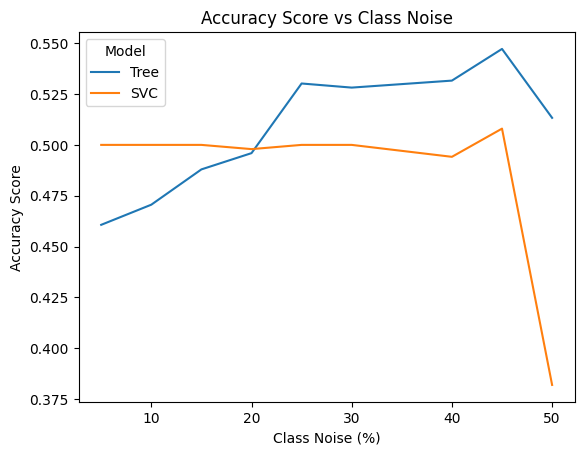

In [44]:
#| fig-align: center

import seaborn as sns

sns.lineplot(data=plotdf,x='Class Noise', y='Accuracy',
            hue='Model')
plt.xlabel('Class Noise (%)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs Class Noise')
plt.show()
plt.show()

# Question 4
The analysis showed that the SVC model performed relatively better than the decision tree classifier on both the DO NOTHING and SMOTE data. This is not unexpected, considering the Decision Tree on its own can handle class imbalance resonably well. The application of SMOTE to the decision tree could lead to creating synthetic samples between samples that represent noise or even the existence of overlapping classes leading to high noise in the data. 

Precision for the SVC i.e the proportion of positive prediction increased significant from 89% in the DO NOTHING data to over 91% for the SMOTE data this could be potentially due to application SMOTE. COnsidering we tunned the hyperparameters of our model for both the DO NOTHING and SMOTE model, we can be assured about the performance of our SVC model. 

Looking at class noise, we could see the impact of class noise size on the performance our model. An increase in class noise results in poor performance of model. 